In [265]:
import pandas as pd
import cufflinks as cf
import seaborn as sn
from IPython.display import display, HTML

cf.set_config_file(sharing="public", theme="space", offline=True)

In [266]:
# Importing dataframes
df_internet = pd.read_csv("final.csv")
df_gdp = pd.read_csv("world_gdp.csv")

The data above were retrieved from kaggle:
- df_internet = https://www.kaggle.com/datasets/ashishraut64/internet-users
- df_gdp = https://www.kaggle.com/datasets/tmishinev/world-country-gdp-19602021

In [267]:
df_internet.sample(5)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
855,855,Bermuda,BMU,2009,129.427170,83.250000,52760,60.906902
8042,8042,Trinidad and Tobago,TTO,2009,139.776138,44.299999,620730,9.845866
8527,8527,Uruguay,URY,2009,122.745003,41.799999,1397859,9.478051
5428,5428,Mongolia,MNG,1989,0.000000,0.000000,0,0.000000
704,704,Belarus,BLR,2020,123.861610,85.089996,8197353,34.452755


In [268]:
df_gdp.sample(5)

,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
7935,Slovak Republic,SVK,1989,NaN,NaN
5606,Bangladesh,BGD,1981,2.024969e+10,247.649617
8483,Timor-Leste,TLS,1991,NaN,NaN
12153,Other small states,OSS,2005,1.836270e+11,8008.480303
10304,West Bank and Gaza,PSE,1998,4.067800e+09,1465.046057


In [269]:
# Renaming column for merging dataframes and reference
df_gdp.rename(columns={"year":"Year",
                "Country Code":"Country_Code"}, inplace=True)

df_internet.rename(columns={"Code":"Country_Code"}, inplace=True)

# Merge dataframes
df_main = df_internet.merge(df_gdp[["Year", "Country_Code", "GDP_USD", "GDP_per_capita_USD"]], on=["Year", "Country_Code"], how="left")
df_main.sample(5)

,Unnamed: 0,Entity,Country_Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP_USD,GDP_per_capita_USD
4915,4915,Malaysia,MYS,1997,9.275236,2.307393,490302,0.000000,1.000050e+11,4637.865661
208,208,Angola,AGO,2002,0.799113,0.270377,47360,0.000000,1.528559e+10,872.494442
6489,6489,Poland,POL,2008,114.520454,53.130001,20467209,11.634671,5.336090e+11,13996.025150
6169,6169,Oman,OMN,2016,153.291458,76.845390,3379722,6.354836,7.512874e+10,16772.739210
4022,4022,Jordan,JOR,1992,0.036755,0.000000,0,0.000000,5.311329e+09,1335.287511


In [270]:
# Filter ASEAN Countries
asean_list = ["IDN", "KHM", "SGP", "VNM", "MMR", "THA", "BRN", "LAO", "MYS", "PHL"]
df_asean = df_main[df_main["Country_Code"].isin(asean_list)]
df_asean
df_asean.sample(5)

,Unnamed: 0,Entity,Country_Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP_USD,GDP_per_capita_USD
1121,1121,Brunei,BRN,2009,107.547684,49.000000,191258,5.217163,1.073237e+10,27956.005140
3723,3723,Indonesia,IDN,2011,101.913231,12.280000,30343842,1.116361,8.929690e+11,3643.047176
7166,7166,Singapore,SGP,2020,144.347122,92.004349,5437341,25.805328,3.452960e+11,60729.450350
6448,6448,Philippines,PHL,2008,74.934761,6.220000,5675895,1.150378,1.816250e+11,1998.026920
3718,3718,Indonesia,IDN,2006,27.822910,4.764813,11044714,0.084759,3.645710e+11,1589.801489


In [271]:
# checking for null values
df_asean.isnull().sum()

Unnamed: 0                 0
Entity                     0
Country_Code               0
Year                       0
Cellular Subscription      0
Internet Users(%)          0
No. of Internet Users      0
Broadband Subscription     0
GDP_USD                   22
GDP_per_capita_USD        22
dtype: int64

In [272]:
# finding null locations
temp = df_asean.isnull().any(axis=1)
temp[temp].index

Index([1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267,
       1268, 4262, 4263, 4264, 4265, 8662, 8663, 8664, 8665, 8666],
      dtype='int64')

In [273]:
# reviewing null values
df_asean.loc[[1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267,
       1268, 4262, 4263, 4264, 4265, 8662, 8663, 8664, 8665, 8666], :]

,Unnamed: 0,Entity,Country_Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP_USD,GDP_per_capita_USD
1256,1256,Cambodia,KHM,1980,0.0,0.0,0,0.0,NaN,NaN
1257,1257,Cambodia,KHM,1981,0.0,0.0,0,0.0,NaN,NaN
1258,1258,Cambodia,KHM,1982,0.0,0.0,0,0.0,NaN,NaN
1259,1259,Cambodia,KHM,1983,0.0,0.0,0,0.0,NaN,NaN
1260,1260,Cambodia,KHM,1984,0.0,0.0,0,0.0,NaN,NaN
1261,1261,Cambodia,KHM,1985,0.0,0.0,0,0.0,NaN,NaN
1262,1262,Cambodia,KHM,1986,0.0,0.0,0,0.0,NaN,NaN
1263,1263,Cambodia,KHM,1987,0.0,0.0,0,0.0,NaN,NaN
1264,1264,Cambodia,KHM,1988,0.0,0.0,0,0.0,NaN,NaN
1265,1265,Cambodia,KHM,1989,0.0,0.0,0,0.0,NaN,NaN


In [274]:
df_asean.dropna().head()

,Unnamed: 0,Entity,Country_Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription,GDP_USD,GDP_per_capita_USD
1093,1093,Brunei,BRN,1980,0.0,0.0,0,0.0,4.928825e+09,25422.03919
1094,1094,Brunei,BRN,1981,0.0,0.0,0,0.0,4.366214e+09,21828.12245
1095,1095,Brunei,BRN,1982,0.0,0.0,0,0.0,4.264252e+09,20693.82491
1096,1096,Brunei,BRN,1983,0.0,0.0,0,0.0,3.844723e+09,18129.24390
1097,1097,Brunei,BRN,1984,0.0,0.0,0,0.0,3.782523e+09,17337.02648


In [275]:
# filter year
df_asean = df_asean[df_asean["Year"] > 1989]

### Southeast Asia Internet User Growth

In [276]:
# pivot table
a = df_asean.pivot(index="Year", columns="Entity", values="Internet Users(%)")

# fill 0 values
a.loc[2018, "Cambodia"] = a.loc[2018, :].median()
a.loc[2019, "Cambodia"] = a.loc[2019, :].median()
a.loc[2020, "Cambodia"] = a.loc[2020, :].median()

a.iplot(kind="line",  xTitle="Year", yTitle="Users(%)")

Countries that were early adopters of the internet, such as Brunei, Singapore, and Malaysia, generally have a higher percentage of internet users than others. Additionally, in 2015, there was a significant increase in user percentages in each country. There is a possibility that this sharp increase was caused by several factors, such as increased smartphone adoption, the rise of social media, and e-commerce growth.

### Internet User Percentage Rank in Southeast Asia (2020)

In [277]:
a[a.index.isin([2020])].sort_values(2020, axis=1).iplot(kind="bar", xTitle="Year", yTitle="Users(%)")

Despite Indonesia contributing 40.8% to the total population of the ASEAN region, it ranks among the countries with the lowest internet usage percentage with numbers barely reach 50%

### GDP Growth in Southeast Asia

In [278]:
b = df_asean.pivot(index="Year", columns="Entity", values="GDP_USD")

b.iplot(kind="line", yTitle="GDP in USD", xTitle="Year")

Although Indonesia has the highest GDP, only 53.73% of the population in Indonesia uses the internet. This data may indicate that there is a significant economic disparity in Indonesia or a low level of digital literacy.

### GDP per Capita In Southeast Asia

In [279]:
c = df_asean.pivot(index="Year", columns="Entity", values="GDP_per_capita_USD")

c[c.index.isin([2020])].sort_values(2020, axis=1).iplot(kind="bar", yTitle="GDP/Capita", xTitle="Year")

By examining the GDP per Capita and internet User Percentage (2020) barchart, we can conclude that countries with a high GDP per capita tend to have higher internet user percentage. Also, the chart above confirms the hypothesis about the economic disparity that is happening in Indonesia is true

### Linear Regression Model

In [280]:
# removing outliers
max_limit = df_asean["Internet Users(%)"].mean() + 3 * df_asean["Internet Users(%)"].std()
min_limit = df_asean["Internet Users(%)"].mean() - 3 * df_asean["Internet Users(%)"].std()

df_asean2 = df_asean[(df_asean["Internet Users(%)"] < max_limit) & (df_asean["Internet Users(%)"] > min_limit)]

<Axes: xlabel='Internet Users(%)', ylabel='GDP_per_capita_USD'>

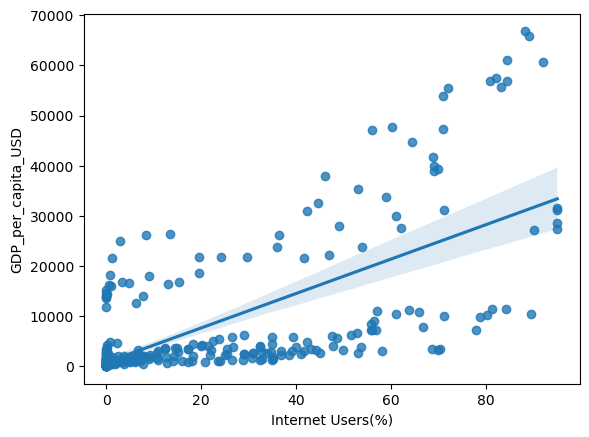

In [281]:
sn.regplot(data=df_asean2, x="Internet Users(%)", y="GDP_per_capita_USD")

The model above shows that the GDP per capita of a country has a significant influence on the percentage of internet users in that respective country.